## Motivation
In recent years, the bicycle sharing industry has developed rapidly, and a variety of bike sharing companies have emerged,There are many brands of shared bicycles, but the placement is very unreasonable. In some places, resources are wasted, and users who really need them are not satisfied.

## Problem brief
We design to study the factors affecting shared bike rental, which includes time, season, weather, temperature, humidity and other factors, like ‘When is the most car rental time of the day?’.

## Goals
Learn more about the shared bicycle industry , to give some suggestions to bike sharing enterprises for better and more reasonable supply of shared bikes, which helps to reduce the waste of social resources.

## Contents
 ### 1. Load package and the data set
 ### 2. Check and take a glance of the data set
 ### 3. Pretreat of the data set
 ### 4..Explore and visualize the data set
 - #### 4.1 Time
  -  4.1.1 Holiday and non holiday/weekday and weekend
  -  4.1.2 Season
 - #### 4.2 Climate
  -  4.2.1 Weather
  -  4.2.2 Temperature
  -  4.2.3 Body temperature
  -  4.2.4 Humidity
  -  4.2.5 Wind speed

## 1. Load package and the data set

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime 
from pandas import Series, DataFrame
%matplotlib inline
Bike = pd.read_csv("../data/bike.csv")

## 2. Check and take a glance of the data set

In [107]:
print(type(Bike))
Bike.head(10)

<class 'pandas.core.frame.DataFrame'>


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [108]:
Bike.shape

(10886, 12)

In [109]:
Bike.index

RangeIndex(start=0, stop=10886, step=1)

In [110]:
Bike.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [111]:
#Check the data set for null value
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [112]:
Bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## 3. Pretreat of the data set

In [113]:
#Extract“date”
Bike["date"] = Bike.datetime.apply(lambda x: x.split()[0])

#Extract"hour"
Bike["hour"]=Bike.datetime.apply(lambda x: x.split()[1].split(":")[0])

dateString = Bike.datetime[1].split()[0]

#Extract"weekday"
Bike["weekday"] = Bike.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

#Extract"month"
Bike["month"] = Bike.date.apply(lambda dateString:  calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month] )

In [114]:
Bike["holiday_map"] = Bike["holiday"].map({0:"non-holiday",1:"holiday"})
Bike["weekday_map"] = Bike["workingday"].map({0:"weekend",1:"weekday"})
Bike['Body_atemp_label'] = Bike['atemp'].apply(lambda value: 'Low' 
                                                          if value <= 15 else 'Medium' 
                                                              if value <= 30 else 'High')
Bike['Windspeed_label'] = Bike['windspeed'].apply(lambda value: 'Breeze' 
                                                          if value <= 10.7 else 'Strong_wind'
                                                              if value <= 20.7 else 'Gale'
                                                                  if value <= 32.6 else 'Typhoon')

## 4..Explore and visualize the data set

Firstly, we analyze the impacts of various factors on shared bicycle rental through heatmap

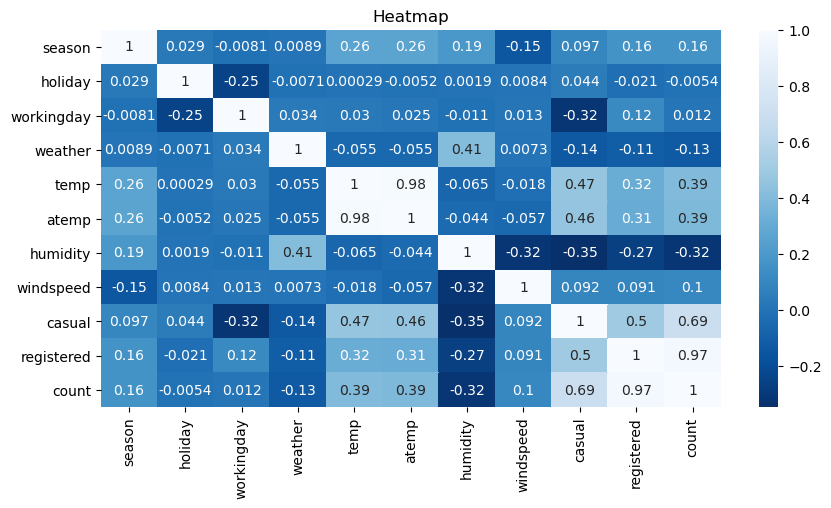

In [115]:
plt.figure(dpi=100,figsize=(10,5))
sns.heatmap(Bike.corr(), annot=True, cmap='Blues_r')
plt.title('Heatmap')
plt.show()

In the above figure, we can find that ‘temp', 'atemp','humidity' havae a great correlations with the number of ‘casual’, 'registered' and 'count', meanwhile, 'season', 'holiday', 'weather' and other factors also have a certain correlation, thus, we do further study from the two main dimensions of time and climate.

## 4.1 Time

### 4.1.1 weekday and weekend
Since there are large differences in the number of days between weekdays and weekends, as well as holidays and non-holidays, we use the average value for analysis

### (1). Study the amount of bike rental on weekday and weekend

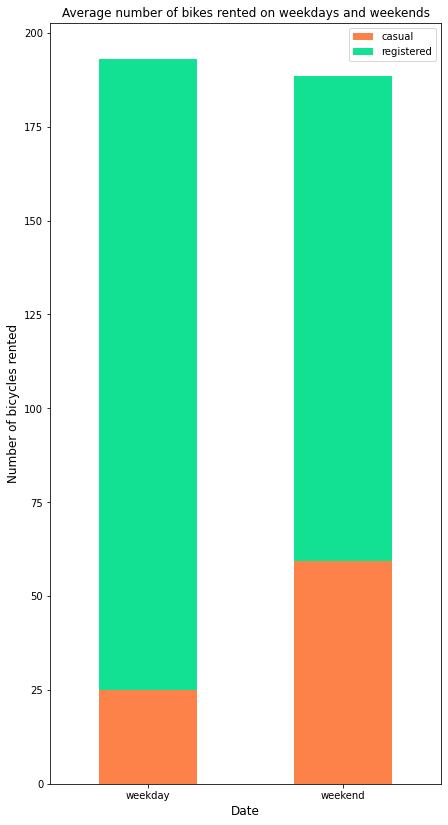

In [116]:
weekday = pd.pivot_table(Bike, values=['casual','registered'], index=['weekday_map'], aggfunc={'casual':np.mean,'registered':np.mean})
weekday.plot(kind='bar',stacked=True,figsize=(7,14),rot=0,color=['#fc824a','#12e193'])
plt.xlabel('Date',fontsize=12)
plt.ylabel('Number of bicycles rented',fontsize=12)
plt.title('Average number of bikes rented on weekdays and weekends',fontsize=12)
plt.legend(loc=0)
plt.show()

From the above figure, we find that the average number of shared bike rentals on weekdays is more than that in weekends, we infer that because people use shared bicycles as a means of transportation to work and school on weekdays, so there is more rental of shared bicycles.However, on weekends, people may stay at home more, or choose cars, subways and other means of transportation for family travel.

### (2). Study the change trend of bike rental weekly and hourly

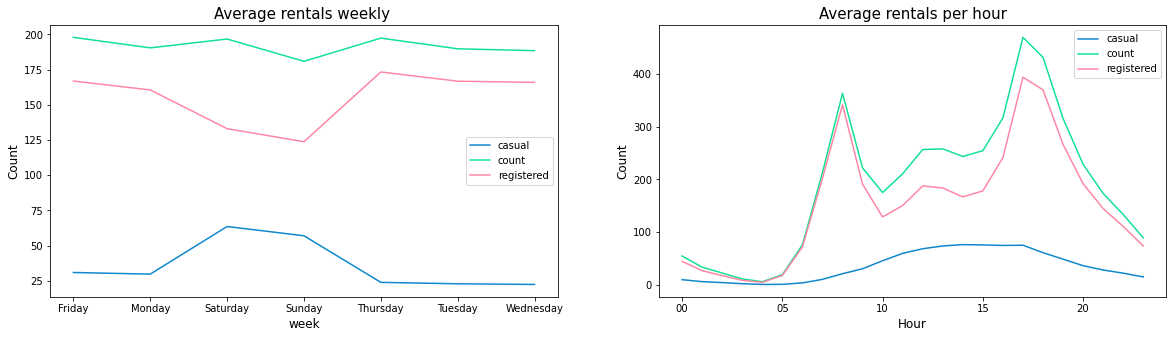

In [117]:
week = pd.pivot_table(Bike, values=['count','casual','registered'],index=['weekday'],aggfunc={'count': np.mean,'casual':np.mean,'registered':np.mean})
hour = pd.pivot_table(Bike, values=['count','casual','registered'],index=['hour'],aggfunc={'count': np.mean,'casual':np.mean,'registered':np.mean})
fig, axes = plt.subplots(1,2,figsize = (20, 5))
week.plot(kind='line',ax=axes[0],color=['#0e87cc','#12e193','#fe86a4'])
axes[0].set_xlabel('week',fontsize=12)
axes[0].set_ylabel('Count',fontsize=12)
axes[0].set_title('Average rentals weekly ',fontsize=15)
hour.plot(kind='line',ax=axes[1],color=['#0e87cc','#12e193','#fe86a4'])
axes[1].set_xlabel('Hour',fontsize=12)
axes[1].set_ylabel('Count',fontsize=12)
axes[1].set_title('Average rentals per hour',fontsize=15)
plt.show()

We found that the number of shared bicycles rented by non registered users on weekends was higher than usual, while the number of registered users decreased,From the perspective of a day, there are two peaks in a day, probably in the morning and evening peak hours. We further subdivide and study the difference between weekends and weekdays.

### (2). Study the change trend of 24 hours on weekdays and weekends

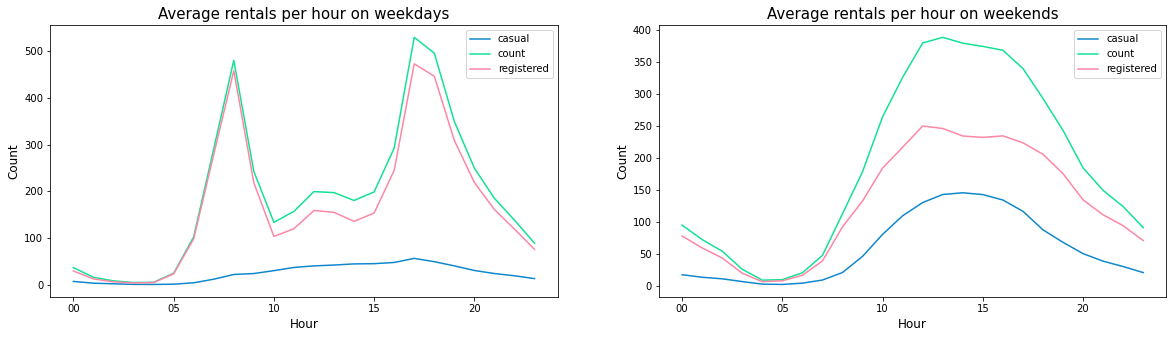

In [118]:
weekday = pd.pivot_table(Bike[Bike['workingday'] == 1], values=['count','casual','registered'],index=['hour'],aggfunc={'count': np.mean,'casual':np.mean,'registered':np.mean})
weekend = pd.pivot_table(Bike[Bike['workingday'] == 0], values=['count','casual','registered'],index=['hour'],aggfunc={'count': np.mean,'casual':np.mean,'registered':np.mean})
fig, axes = plt.subplots(1,2,figsize = (20, 5))
weekday.plot(kind='line',ax=axes[0],color=['#0e87cc','#12e193','#fe86a4'])
axes[0].set_xlabel('Hour',fontsize=12)
axes[0].set_ylabel('Count',fontsize=12)
axes[0].set_title('Average rentals per hour on weekdays',fontsize=15)
weekend.plot(kind='line',ax=axes[1],color=['#0e87cc','#12e193','#fe86a4'])
axes[1].set_xlabel('Hour',fontsize=12)
axes[1].set_ylabel('Count',fontsize=12)
axes[1].set_title('Average rentals per hour on weekends',fontsize=15)
plt.show()

From the change trend of the day,we find that the peak of weekdays mainly occurs from 7:00-8:00 and from 17:00-18:00, the rental peak on weekends is mainly located in afternoon.Therefore, we draw the following inference: On weekdays,7:00-8:00 and 17:00-18:00 are the time when students go to and from school as well as people go to work and from work, people will share bicycles as a means of commuting,but on weekends, people may use shared bikes as a means of transportation for afternoon travel and pastime.

### (3). Study the percentage of casual and registered in the total lease on weekday and weekend

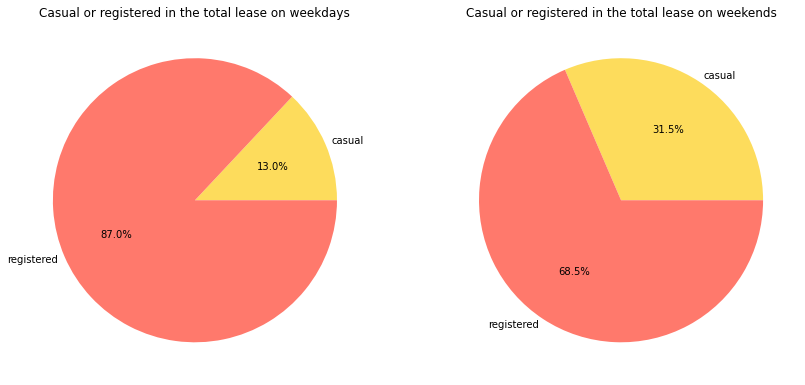

In [119]:
weekday_pie=Bike[Bike['workingday'] == 1]
weekday_pieplot=weekday_pie[['casual','registered']].sum()
weekend_pie=Bike[Bike['workingday'] == 0]
weekend_pieplot=weekend_pie[['casual','registered']].sum()
fig = plt.figure(figsize = (14, 7)) 
plt.subplot(1, 2, 1)
plt.pie(weekday_pieplot, labels=['casual','registered'], autopct='%1.1f%%', 
        pctdistance=0.6 , labeldistance=1.05 , radius=1,colors=['#fddc5c','#ff796c'])  
plt.title('Casual or registered in the total lease on weekdays',fontsize=12)
plt.subplot(1, 2, 2)
plt.pie(weekend_pieplot, labels=['casual','registered'], autopct='%1.1f%%', 
        pctdistance=0.6 , labeldistance=1.05 , radius=1,colors=['#fddc5c','#ff796c'])  
plt.title('Casual or registered in the total lease on weekends',fontsize=12)
plt.show()

From the above figure, we can see that, on the whole, registered members rent more cars than non registered members.Secondly, the number of non registered members renting cars on weekends has increased.This may be people often use shared bikes as commuting tools on weekdays and register as a member. On weekends, people only use shared bikes as transportation tool for travel, which may only be used for a short time, so they will not register as a member.

### 4.1.2 Holiday and non holiday

### (1). Study the amount of car rental on holidays and non holidays

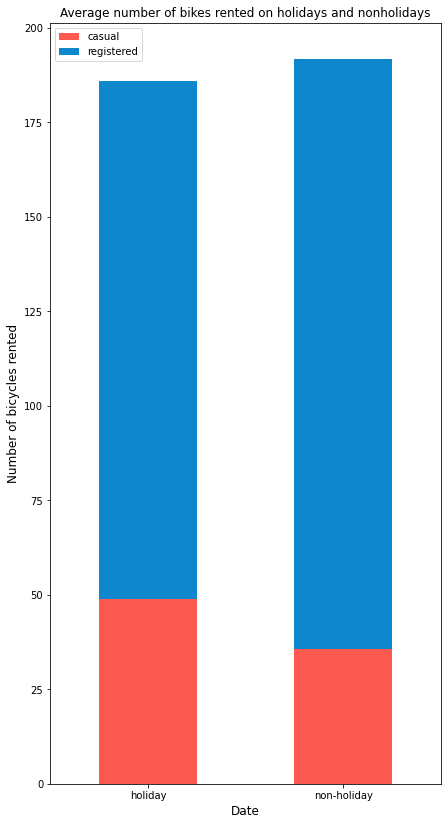

In [120]:
holiday = pd.pivot_table(Bike, values=['casual','registered'], index=['holiday_map'], aggfunc={'casual':np.mean,'registered':np.mean})
holiday.plot(kind='bar',stacked=True,figsize=(7,14),rot=0,color=['#fc5a50','#0e87cc'])
plt.xlabel('Date',fontsize=12)
plt.ylabel('Number of bicycles rented',fontsize=12)
plt.title('Average number of bikes rented on holidays and nonholidays',fontsize=12)
plt.legend(loc=0)
plt.show()

From the above figure,we find the result is similar to those on holidays and non holidays, which is that the total number of shared bicycle rentals on weekdays is more than that on weekends, thus we can be more sure of the above inference.

### (2). Study the change trend of 24 hours on holidays and non holidays

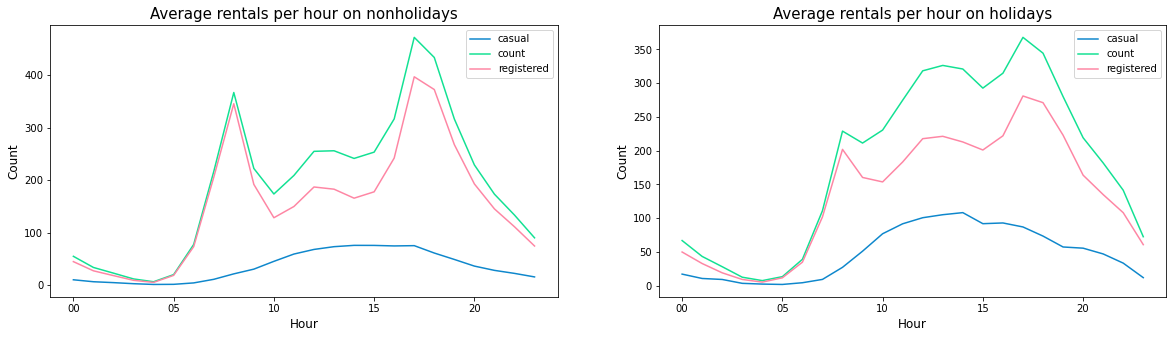

In [121]:
holiday = pd.pivot_table(Bike[Bike['holiday'] == 1], values=['count','casual','registered'],index=['hour'],aggfunc={'count': np.mean,'casual':np.mean,'registered':np.mean})
nonholiday = pd.pivot_table(Bike[Bike['holiday'] == 0], values=['count','casual','registered'],index=['hour'],aggfunc={'count': np.mean,'casual':np.mean,'registered':np.mean})
fig, axes = plt.subplots(1,2,figsize = (20, 5))
nonholiday.plot(kind='line',ax=axes[0],color=['#0e87cc','#12e193','#fe86a4'])
axes[0].set_xlabel('Hour',fontsize=12)
axes[0].set_ylabel('Count',fontsize=12)
axes[0].set_title('Average rentals per hour on nonholidays',fontsize=15)
holiday.plot(kind='line',ax=axes[1],color=['#0e87cc','#12e193','#fe86a4'])
axes[1].set_xlabel('Hour',fontsize=12)
axes[1].set_ylabel('Count',fontsize=12)
axes[1].set_title('Average rentals per hour on holidays',fontsize=15)
plt.show()

It has the similar trends on non holidays and holidays,and the two peaks on non holidays are more prominent,which further supports the inference that people use shared bicycles as commuting tools.

### (3). Study the percentage of casual and registered in the total lease on holiday and non holiday.

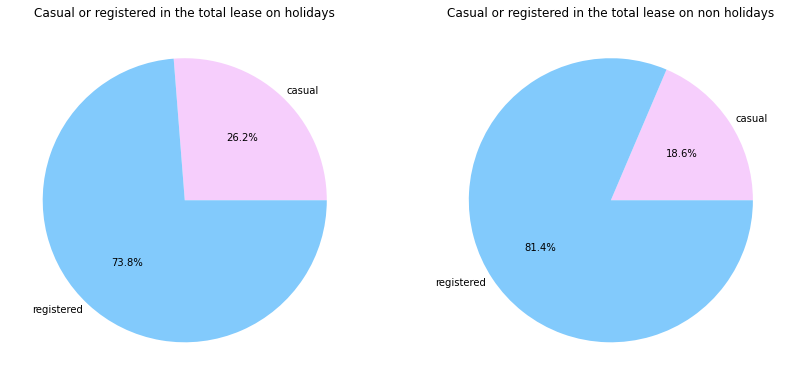

In [122]:
holiday_pie=Bike[Bike['holiday'] == 1]
holiday_pieplot=holiday_pie[['casual','registered']].sum()
nonholiday_pie=Bike[Bike['holiday'] == 0]
nonholiday_pieplot=nonholiday_pie[['casual','registered']].sum()
fig = plt.figure(figsize = (14, 7)) 
plt.subplot(1, 2, 1)
plt.pie(holiday_pieplot, labels=['casual','registered'], autopct='%1.1f%%', 
        pctdistance=0.6 , labeldistance=1.05 , radius=1,colors=['#f6cefc','#82cafc'])  
plt.title('Casual or registered in the total lease on holidays',fontsize=12)
plt.subplot(1, 2, 2)
plt.pie(nonholiday_pieplot, labels=['casual','registered'], autopct='%1.1f%%', 
        pctdistance=0.6 , labeldistance=1.05 , radius=1,colors=['#f6cefc','#82cafc'])  
plt.title('Casual or registered in the total lease on non holidays',fontsize=12)
plt.show()

The same situation can be seen in holidays and non holidays

### 4.1.2 Season
### (1). The change of average number of rental bikes in different seasons
Firstly, we would like to figure out the change of the average number of rental bikes in different seasons.

In [123]:
table1a = pd.pivot_table(Bike, values=['casual','registered','count'], index=['season'], aggfunc={'casual': np.mean,'registered': np.mean,'count': np.mean})
table1a

,casual,count,registered
season,,,
1,15.489576,116.343261,100.853686
2,47.446762,215.251372,167.804610
3,52.220271,234.417124,182.196853
4,28.580834,198.988296,170.407462


In [124]:
table1a.columns = Series(['number of casual', 'number of registrations','total number'])
table1a

,number of casual,number of registrations,total number
season,,,
1,15.489576,116.343261,100.853686
2,47.446762,215.251372,167.804610
3,52.220271,234.417124,182.196853
4,28.580834,198.988296,170.407462


In [125]:
table1a.index = Series(['Spring', 'Summer', 'Autumn','Winter'])
table1a

,number of casual,number of registrations,total number
Spring,15.489576,116.343261,100.853686
Summer,47.446762,215.251372,167.804610
Autumn,52.220271,234.417124,182.196853
Winter,28.580834,198.988296,170.407462


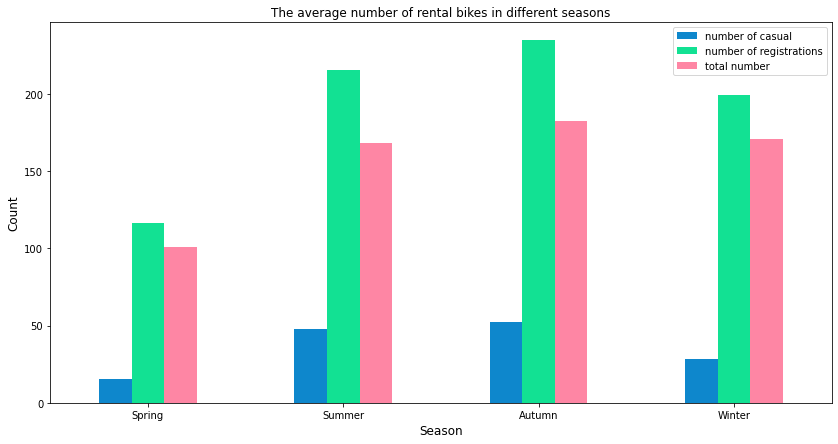

In [126]:
table1a.plot(kind='bar', figsize=(14,7),fontsize=10,rot=0,title = 'The average number of rental bikes in different seasons',color=['#0e87cc','#12e193','#fe86a4'])
plt.xlabel('Season',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

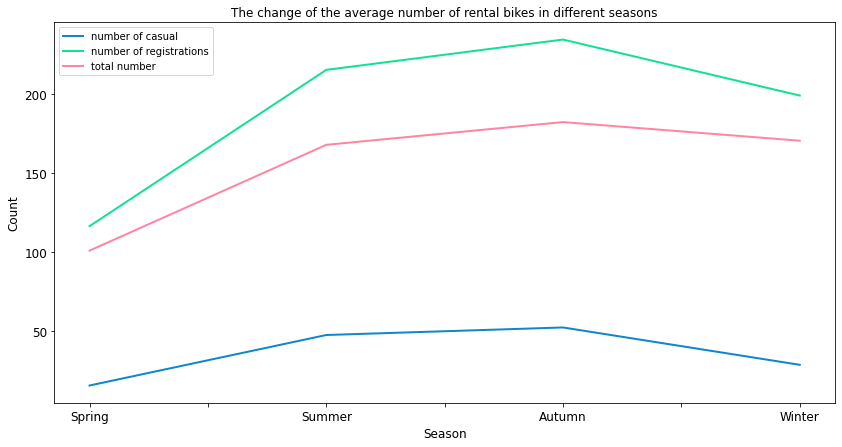

In [127]:
table1a.plot(kind='line',figsize=(14,7),fontsize=12,linewidth=2,title='The change of the average number of rental bikes in different seasons',color=['#0e87cc','#12e193','#fe86a4'])
plt.xlabel('Season',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

According to the above figure, we could find out the average number of rental bikes started to climb when summer came and then started to declined when winter came. This trends fit all the three types ( casual, registrations and total ). This may because the weather of Washington is relatively dry in summer and it is very cold in winter. Therefore, it would be better to put more bikes on summer and autumn.

### (2). Changes in the number of rental bike during holidays and non-holidays in different seasons
Secondly, we would like to figure out the change of the average number of rental bikes during holidays and non-holidays in different seasons.

In [128]:
Bike_holiday = Bike.loc[Bike['holiday'].isin([0,1])]

In [129]:
Bike_holiday_pivot = Bike_holiday.pivot_table(values='count',columns='holiday',index='season')
Bike_holiday_pivot

holiday,0,1
season,,
1,117.494837,73.929577
2,215.562756,197.833333
3,234.293136,237.822917
4,198.560273,210.750000


Bike_holiday_pivot = Bike_holiday.pivot_table(values='count',columns='holiday',index='season')
Bike_holiday_pivot

In [130]:
Bike_holiday_pivot.columns = Series(['non-holidays', 'holidays'])
Bike_holiday_pivot

,non-holidays,holidays
season,,
1,117.494837,73.929577
2,215.562756,197.833333
3,234.293136,237.822917
4,198.560273,210.750000


In [131]:
Bike_holiday_pivot.index = Series(['Spring', 'Summer', 'Autumn','Winter'])
Bike_holiday_pivot

,non-holidays,holidays
Spring,117.494837,73.929577
Summer,215.562756,197.833333
Autumn,234.293136,237.822917
Winter,198.560273,210.750000


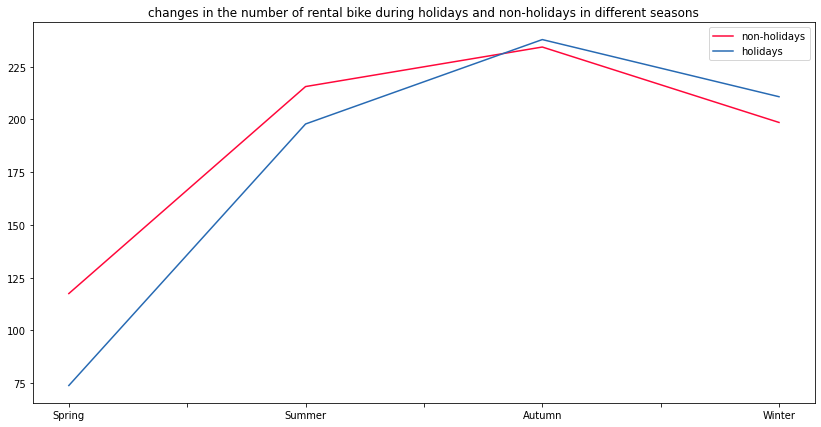

In [132]:
Bike_holiday_pivot.plot(kind='line', figsize=(14,7),fontsize=10,title='changes in the number of rental bike during holidays and non-holidays in different seasons',color=['#ff073a','#276ab3'])
plt.show()

According to above figure, we could find out that the number of rental bikes during holidays or non-holidays continued to grow  before the winter. And the number of  rental bikes during holidays started to exceed in autumn, which lasted until winter. This means it would be better to start to put more bikes in autumn holiday.

### (3). Changes in the number of rental bike during weekends and weekdays in different seasons

In [133]:
Bike_workingday = Bike.loc[Bike['workingday'].isin([0,1])]

In [134]:
Bike_workingday_pivot = Bike_holiday.pivot_table(values='count',columns='workingday',index='season')

In [135]:
Bike_workingday_pivot = Bike_workingday_pivot.rename(columns={1: 'weekdays',0: 'weekends'})
Bike_workingday_pivot

workingday,weekends,weekdays
season,,
1,105.727273,121.326039
2,222.692857,211.949287
3,232.520270,235.330081
4,192.137387,202.283857


In [136]:
Bike_workingday_pivot.columns = Series(['weekends', 'weekdays'])
Bike_workingday_pivot

,weekends,weekdays
season,,
1,105.727273,121.326039
2,222.692857,211.949287
3,232.520270,235.330081
4,192.137387,202.283857


In [137]:
Bike_workingday_pivot.index = Series(['Spring', 'Summer', 'Autumn','Winter'])
Bike_workingday_pivot

,weekends,weekdays
Spring,105.727273,121.326039
Summer,222.692857,211.949287
Autumn,232.520270,235.330081
Winter,192.137387,202.283857


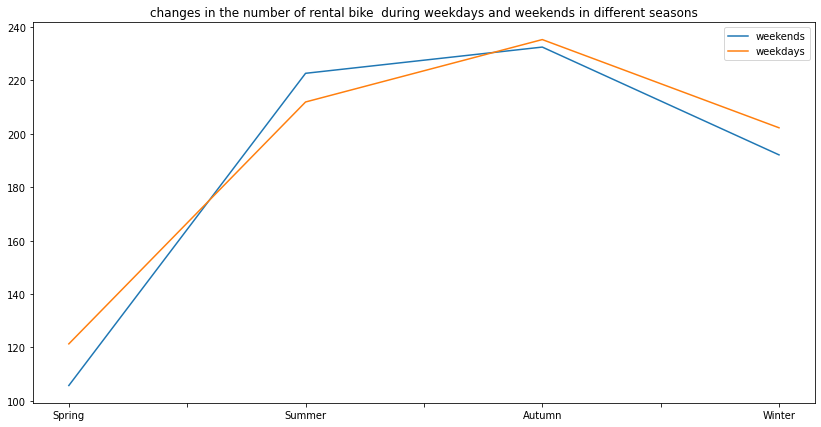

In [138]:
Bike_workingday_pivot.plot(kind='line', figsize=(14,7),fontsize=10,title='changes in the number of rental bike  during weekdays and weekends in different seasons')
plt.show()

According to above figure, we could find out that the number of rental bikes during weekdays and weekends continued to grow  before the winter. And the number of  rental bikes during weekends started to exceed in summer. However, it started to be less than the number of  rental bikes during weekdays in autumnm, which lasted until winter. But we do not think this trend should be considered since the difference in quantity is relatively small.

## 4.2 Climate

### 4.2.1 Weather
### (1). Analyze the change in the number of car rentals under different weather conditions
Firstly, we count the total bike rentals under various weather conditions

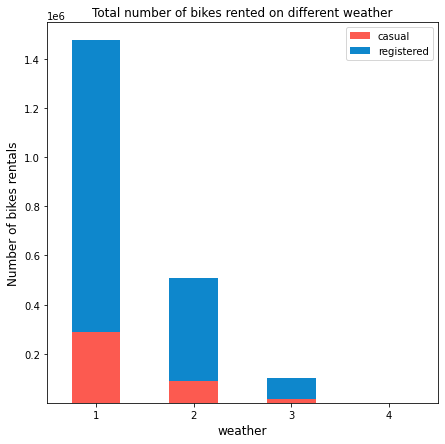

In [139]:
weather_plt = pd.pivot_table(Bike, values=['casual','registered'], index=['weather'], aggfunc={'casual':np.sum,'registered':np.sum})
weather_plt.plot(kind='bar', rot=0,stacked=True,figsize=(7,7),color=['#fc5a50','#0e87cc'])
plt.xlabel('weather',fontsize=12)
plt.ylabel('Number of bikes rentals',fontsize=12)
plt.title('Total number of bikes rented on different weather',fontsize=12)
plt.legend()
plt.show()

In terms of the total number, it is obvious that the better the weather, the more people rent bikes, and the worse the weather, the fewer rentals.

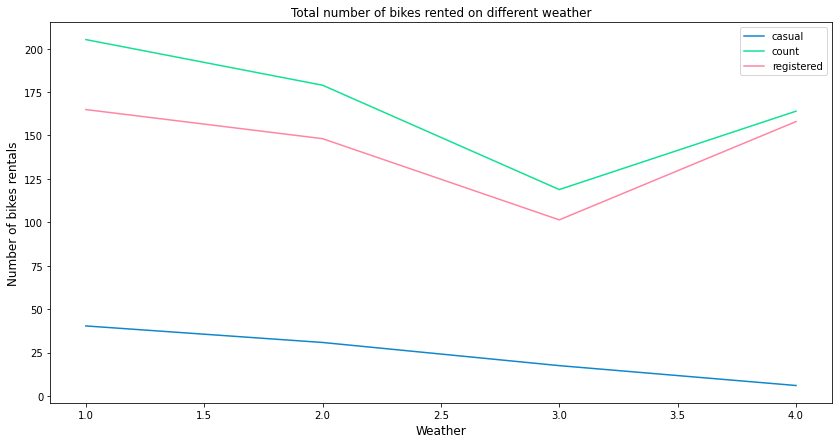

In [140]:
temp_plt = pd.pivot_table(Bike, values=['count','casual','registered'],index=['weather'],aggfunc={'count':np.mean,'casual':np.mean,'registered':np.mean})
temp_plt.plot(kind='line', rot=0,figsize=(14,7),color=['#0e87cc','#12e193','#fe86a4'])
plt.xlabel('Weather',fontsize=12)
plt.ylabel('Number of bikes rentals',fontsize=12)
plt.title('Total number of bikes rented on different weather',fontsize=12)
plt.legend()
plt.show()

We are surprised to find that in the most extreme rainstorm and snow weather, the average number of bikes rented was even more than that in other weather conditions, In particular, the number of rentals from registered members in weather 4 is even more than that in weather 2 with good weather conditions, However, it's total number is almost zero. Thus,we infer that there may be some outliers in weather 4,As we have found before, there is a large amount of car rental for registered members on weekdays, we guess whether the bike rental in weather 4 occurs during the rush hour.So we check the specific data of weather 4.

In [141]:
Bike[Bike['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month,holiday_map,weekday_map,Body_atemp_label,Windspeed_label
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012-01-09,18,Monday,January,non-holiday,weekday,Low,Breeze


In [142]:
Bike[Bike['weather']==4]['count']

5631    164
Name: count, dtype: int64

It is as expected, there was only one data for weather 4, and it happened at 18:00, the peak time of work, and the car rental volume reached 164, so it has a high average. we decided to ignore this outlier.Through the analysis, we can conclude that the weather has a great impact on the bikes rental,the better the weather, the more people rent bikes.

### 4.2.2 Temperature
### (1). Analysis of how temperature affects people renting bicycles

In [143]:
#Set the temperature interval
Bike["temp_band"] = pd.cut(Bike["temp"],8)

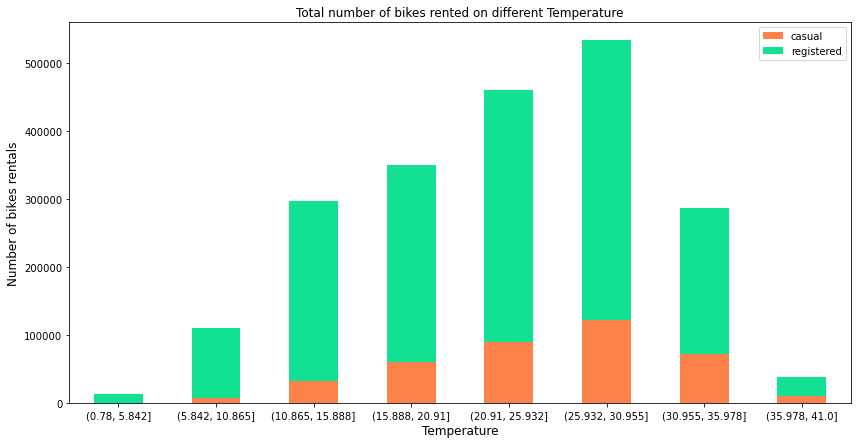

In [144]:
tem_plt = pd.pivot_table(Bike, values=['casual','registered'], index=['temp_band'], aggfunc={'casual':np.sum,'registered':np.sum})
tem_plt.plot(kind='bar', rot=0,stacked=True,figsize=(14,7),color=['#fc824a','#12e193'])
plt.xlabel('Temperature',fontsize=12)
plt.ylabel('Number of bikes rentals',fontsize=12)
plt.title('Total number of bikes rented on different Temperature',fontsize=12)
plt.legend()
plt.show()

In terms of the total number, there are more bike rentals between 20 and 30 degrees, and fewer bike rentals at low and high temperatures

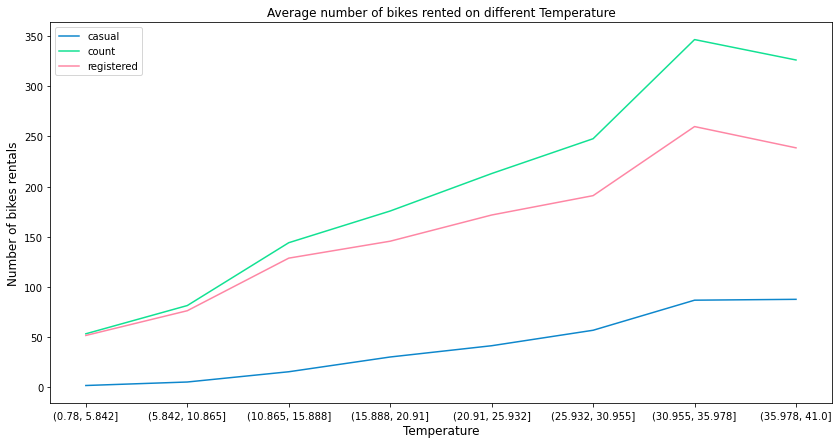

In [145]:
temp_plt = pd.pivot_table(Bike, values=['count','casual','registered'],index=['temp_band'],aggfunc={'count':np.mean,'casual':np.mean,'registered':np.mean})
temp_plt.plot(kind='line', rot=0,figsize=(14,7),color=['#0e87cc','#12e193','#fe86a4'])
plt.xlabel('Temperature',fontsize=12)
plt.ylabel('Number of bikes rentals',fontsize=12)
plt.title('Average number of bikes rented on different Temperature',fontsize=12)
plt.legend()
plt.show()

From the average trend, the number of bike rentals increases with the rise of temperature, reaches the peak at 30-35 degrees, and decreases after exceeding 35 degrees

### 4.2.5 Body temperatures
### (1). The number of people who rent bicycles at different body temperatures

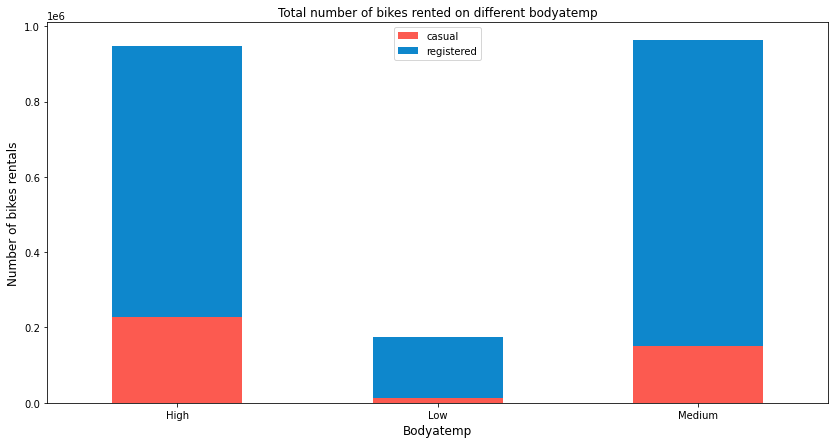

In [146]:
wind_plt = pd.pivot_table(Bike, values=['casual','registered'],index=['Body_atemp_label'],aggfunc={'casual':np.sum,'registered':np.sum})
wind_plt.plot(kind='bar',rot=0,stacked=True,figsize=(14,7),color=['#fc5a50','#0e87cc'])
plt.xlabel('Bodyatemp',fontsize=12)
plt.ylabel('Number of bikes rentals',fontsize=12)
plt.title('Total number of bikes rented on different bodyatemp',fontsize=12)
plt.legend()
plt.show()

From the total value, when the body temperature is moderate and high, there are more bicycles to rent

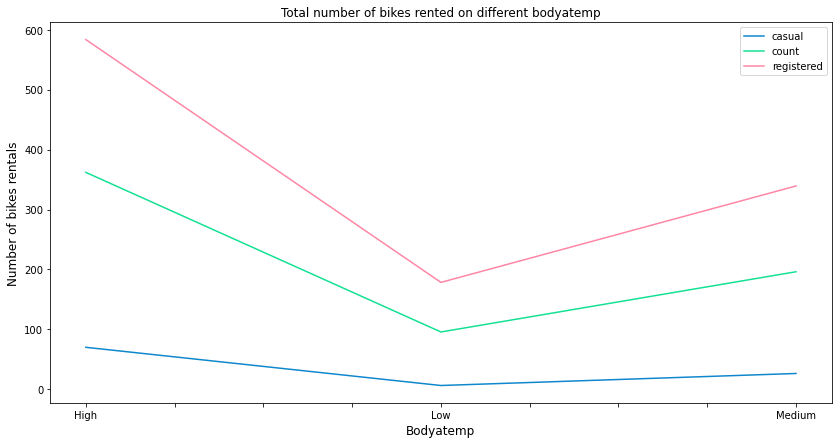

In [147]:
wind_plt = pd.pivot_table(Bike,values=['count','casual','registered'],index=['Body_atemp_label'],aggfunc={'count':np.mean,'casual':np.mean,'registered':np.mean})
wind_plt.plot(kind='line',rot=0,stacked=True,figsize=(14,7),color=['#0e87cc','#12e193','#fe86a4'])
plt.xlabel('Bodyatemp',fontsize=12)
plt.ylabel('Number of bikes rentals',fontsize=12)
plt.title('Total number of bikes rented on different bodyatemp',fontsize=12)
plt.legend()
plt.show()

The average trend also shows the same result

### 4.2.3 Humidity
### (1). Analysis of how Humidity affects people renting bicycles

In [148]:
#Set the humidity interval
Bike["humidity_band"] = pd.cut(Bike['humidity'],10)

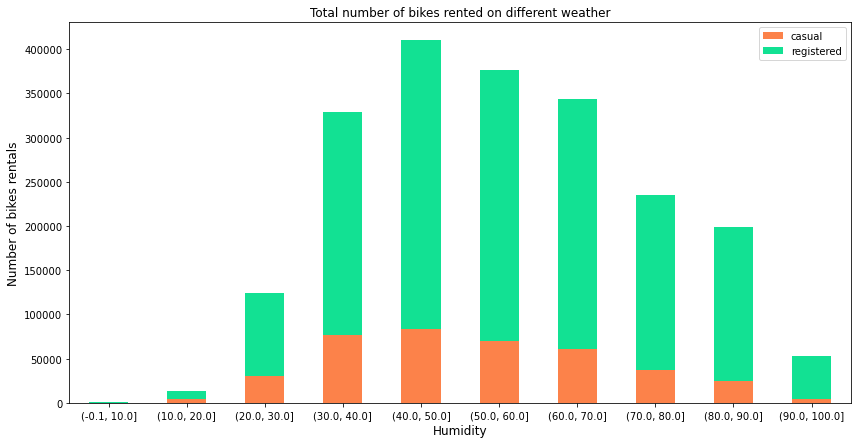

In [149]:
tem_plt = pd.pivot_table(Bike, values=['casual','registered'], index=['humidity_band'], aggfunc={'casual':np.sum,'registered':np.sum})
tem_plt.plot(kind='bar', rot=0,stacked=True,figsize=(14,7),color=['#fc824a','#12e193'])
plt.xlabel('Humidity',fontsize=12)
plt.ylabel('Number of bikes rentals',fontsize=12)
plt.title('Total number of bikes rented on different weather',fontsize=12)
plt.legend()
plt.show()

From the graph, it can be seen that the highest number of people rent bicycles is appeared when the humidity is between 40 and 50.After that the number of rent bikes is gradually decreased . And it can be found that whether the humidity is too high or too low,there are not many people riding bikes.So if the weather is extremely humid or dry, few people rent bicycles.

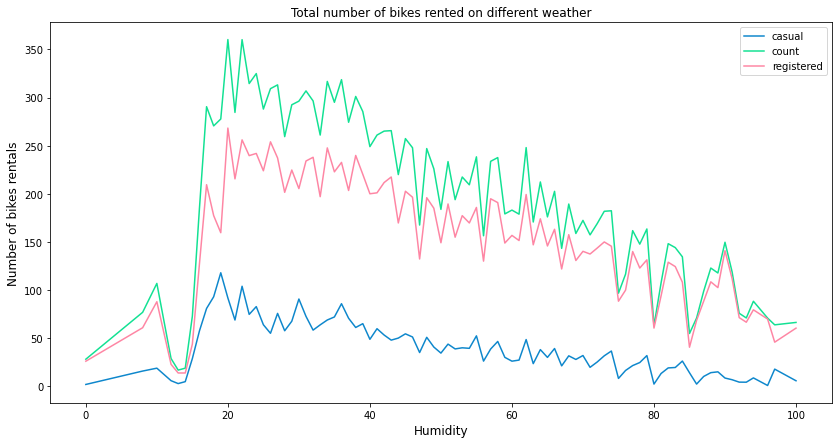

In [150]:
temp_plt = pd.pivot_table(Bike, values=['count','casual','registered'],index=['humidity'],aggfunc={'count':np.mean,'casual':np.mean,'registered':np.mean})
temp_plt.plot(kind='line', rot=0,figsize=(14,7),color=['#0e87cc','#12e193','#fe86a4'])
plt.xlabel('Humidity',fontsize=12)
plt.ylabel('Number of bikes rentals',fontsize=12)
plt.title('Total number of bikes rented on different weather',fontsize=12)
plt.legend()
plt.show()

There are some differences in the average trend. The number of rented shared bicycles reaches the peak at about 20 degrees humidity, and then gradually decreases,however, there are still high car rentals between 20 - 60 humidity.

### 4.2.4 Wind speeds
In the pre-processing of the data, we classify the temperature including weather temperature/sensory temperature into high temperature/low temperature/medium temperature. At the same time, we also divide the wind speed into four categories according to the windspeed classification standard.

In [151]:
Bike.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,date,hour,weekday,month,holiday_map,weekday_map,Body_atemp_label,Windspeed_label,temp_band,humidity_band
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,2011-01-01,00,Saturday,January,non-holiday,weekend,Low,Breeze,"(5.842, 10.865]","(80.0, 90.0]"
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,2011-01-01,01,Saturday,January,non-holiday,weekend,Low,Breeze,"(5.842, 10.865]","(70.0, 80.0]"
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,2011-01-01,02,Saturday,January,non-holiday,weekend,Low,Breeze,"(5.842, 10.865]","(70.0, 80.0]"
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,2011-01-01,03,Saturday,January,non-holiday,weekend,Low,Breeze,"(5.842, 10.865]","(70.0, 80.0]"
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,2011-01-01,04,Saturday,January,non-holiday,weekend,Low,Breeze,"(5.842, 10.865]","(70.0, 80.0]"


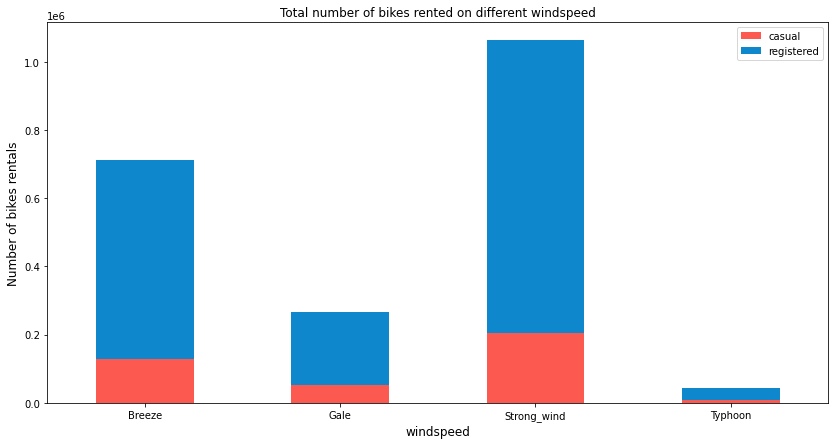

In [152]:
wind_plt = pd.pivot_table(Bike, values=['casual','registered'],index=['Windspeed_label'],aggfunc={'casual':np.sum,'registered':np.sum})
wind_plt.plot(kind='bar',rot=0,stacked=True,figsize=(14,7),color=['#fc5a50','#0e87cc'])
plt.xlabel('windspeed',fontsize=12)
plt.ylabel('Number of bikes rentals',fontsize=12)
plt.title('Total number of bikes rented on different windspeed',fontsize=12)
plt.legend()
plt.show()

In the above figure, we can find the rental situation of bicycles under different wind speeds. From this, we can find that when the wind speed is less than 20.7 per meter, there are light and strong winds, and there are more bicycle rentals.In extreme cases of strong winds and typhoons, the number of bicycles rented is fewer

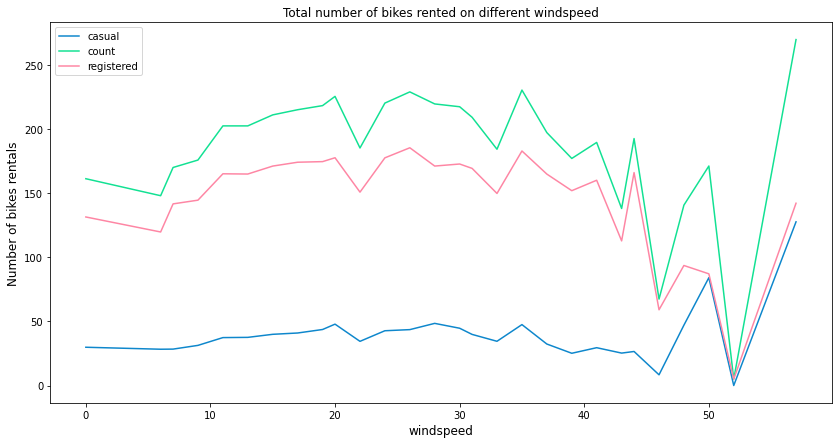

In [153]:
wind_plt = pd.pivot_table(Bike, values=['count','casual','registered'],index=['windspeed'],aggfunc={'count': np.mean,'casual':np.mean,'registered':np.mean})
wind_plt.plot(kind='line', rot=0,figsize=(14,7),color=['#0e87cc','#12e193','#fe86a4'])
plt.xlabel('windspeed',fontsize=12)
plt.ylabel('Number of bikes rentals',fontsize=12)
plt.title('Total number of bikes rented on different windspeed',fontsize=12)
plt.legend()
plt.show()

However, when we look at the average trend, the number of shared bicycle rentals that originally decreased with the increase of wind speed after the wind speed is 20, suddenly rebounded at 55 wind speed, so we infer that there is an abnormal value here, so we checked the details of high wind speed.

In [154]:
Bike[Bike['windspeed'] > 50]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,date,hour,weekday,month,holiday_map,weekday_map,Body_atemp_label,Windspeed_label,temp_band,humidity_band
760,2011-02-15 01:00:00,1,0,1,1,12.30,12.12,42,51.9987,0,...,2011-02-15,01,Tuesday,February,non-holiday,weekday,Low,Typhoon,"(10.865, 15.888]","(40.0, 50.0]"
868,2011-02-19 15:00:00,1,0,0,1,18.04,21.97,16,50.0021,84,...,2011-02-19,15,Saturday,February,non-holiday,weekend,Medium,Typhoon,"(15.888, 20.91]","(10.0, 20.0]"
2755,2011-07-03 17:00:00,3,0,0,3,32.80,37.12,49,56.9969,181,...,2011-07-03,17,Sunday,July,non-holiday,weekend,High,Typhoon,"(30.955, 35.978]","(40.0, 50.0]"
2756,2011-07-03 18:00:00,3,0,0,3,32.80,37.12,49,56.9969,74,...,2011-07-03,18,Sunday,July,non-holiday,weekend,High,Typhoon,"(30.955, 35.978]","(40.0, 50.0]"


In [155]:
Bike[Bike['windspeed'] > 50]['count']

760       5
868     171
2755    358
2756    181
Name: count, dtype: int64

Through the analysis, it is found that the number of days with wind speed greater than 50 is only 4 days, while the number of rented shared bicycles is a lot, which has a great impact on the data. Therefore, we exclude this special case in the analysis

### Conclusion
##### In terms of time dimension.
- First, about working days and weekends, holidays and non holidays. People rent shared bikes more on weekdays and non holidays as commuting tools, use less when they are on vacation, therefore, companies can increase the amount of bike sharing on weekdays and non holidays.In terms of supply time period, operators can consider increasing the amount of bike sharing in the morning and evening rush hours on weekdays and non holidays.Besides, operators can increase the amount of supply in the afternoon on weekends and holidays.At the same time, bike sharing enterprises can simplify the registration process and launch corresponding activities to encourage people to register as members when they go out on weekends and holidays.
- Secondly, about season,we should put more bikes on summer and autumn,and also start to put more bikes in autumn holiday.Not considered  the trend of weekdays and weekends since the difference in quantity is relatively small.

##### From the climate dimension.
- In terms of the weather,we can find that the better the weather, the more people rent bikes.Therefore, operators can put more shared bicycles on sunny days.
- About temperature.The temperature is between 20-30 and the number of people renting bicycles is the most, so it can be suitable for more shared bicycles.
- From the perspective of somatosensory temperature.People like to ride a bike when the body temperature is moderate. Too cold and too hot will reduce the willingness to rent a bicycle. Therefore, sharing bicycles companies can pay attention to the temperature of the day while also taking the body temperature into consideration.
- About the influence of humidity, it can be found that whether the humidity is too high or too low,there are not many people riding bikes.So if the weather is extremely humid or dry, few people rent bicycles.Therefore, shared bicycle companies can increase the amount of shared bicycles when the humidity is appropriate, and can relatively reduce the amount of shared bicycles in too dry and humid weather.
- Lastly,about effect of wind speed,we can find that when the wind speed is less than 20.7 per meter, there are light and strong winds, and there are more bicycle rentals.In extreme cases of strong winds and typhoons, the number of bicycles rented is fewer.Therefore, operators can reduce the release of shared bicycles in extreme weather, which can also reduce bicycle damage.